In [1]:
import pandas as pd
df_2016= pd.read_csv('2016년.csv', encoding='cp949')
df_2017= pd.read_csv('2017년.csv', encoding='cp949')
df_2018= pd.read_csv('2018년.csv', encoding='cp949')


In [2]:
df_fine_dust_temp = pd.concat([df_2016,df_2017,df_2018], axis = 0 )   # 수직적 결합

In [3]:
df_fine_dust = df_fine_dust_temp[['시도','일시','PM10','PM25']]


In [4]:
sido_code = {
     '42' : '강원',
     '41' : '경기',
     '43' : '충북',
     '44' : '충남',
     '30' : '대전',
     '47' : '경북',
     '48' : '경남',
     '45' : '전북',
     '46' : '전남', 
     '11' : '서울', 
     '28' : '인천',
     '27' : '대구',
     '31' : '울산',
     '29' : '광주', 
     '26' : '부산', 
     '49' : '제주',
     '36' : '세종'
}

# dust_grade = {
#     '1' : [0:30],
#     '2' : [31:80],
#     '3' : [81:150],
#     '4' : [151: ]    
# }

# fine_dust_grade = {
#     '1': [0:15],
#     '2': [16:50],
#     '3': [51:99],
#     '4': [100:]
# }

In [5]:
def sido_code_func(vec1):
    for i in sido_code:
        if vec1 == sido_code[i]:
            return i
            pass
        pass
    pass


def dust_grade_func(m):
    if m <= 30 : 
        return '1'
    elif m <=80 :
        return '2'
    elif m <150 :
        return '3'
    elif m >= 150:
        return '4'
    else:
        return 
        pass
    pass
pass

def fdust_grade_func(n):
    if n <= 15 : 
        return '1'
    elif n <= 50 :
        return '2'
    elif n < 100 :
        return '3'
    elif n >= 100:
        return '4'
    else:
        return 'missing value2'
        pass
    pass
pass



In [6]:
df_fine_dust['시도코드']=df_fine_dust['시도'].apply(sido_code_func)

df_fine_dust['PM10등급']=df_fine_dust['PM10'].apply(dust_grade_func)
df_fine_dust['PM25등급']=df_fine_dust['PM25'].apply(fdust_grade_func)
print(df_fine_dust.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18632 entries, 0 to 6204
Data columns (total 7 columns):
시도        18632 non-null object
일시        18632 non-null int64
PM10      18632 non-null float64
PM25      18510 non-null float64
시도코드      18632 non-null object
PM10등급    18632 non-null object
PM25등급    18632 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [7]:
df_fine_dust=df_fine_dust[['시도코드','일시','시도','PM10','PM25','PM10등급','PM25등급']]

df_fine_dust[df_fine_dust['시도']=='세종']

,시도코드,일시,시도,PM10,PM25,PM10등급,PM25등급
3294,36,20160101,세종,62.229167,NaN,2,missing value2
3295,36,20160102,세종,52.291667,NaN,2,missing value2
3296,36,20160103,세종,67.333333,NaN,2,missing value2
3297,36,20160104,세종,71.562500,NaN,2,missing value2
3298,36,20160105,세종,33.291667,NaN,2,missing value2
...,...,...,...,...,...,...,...
3645,36,20181227,세종,22.489583,7.117021,1,1
3646,36,20181228,세종,38.687500,15.568421,2,2
3647,36,20181229,세종,42.739583,16.843750,2,2
3648,36,20181230,세종,35.854167,19.135417,2,2


In [8]:
# 결측치 확인

df_fine_dust.isnull().sum()
# df_fine_dust.loc[df_fine_dust["PM10등급"] == 'missing value', ["PM10", "PM10등급"]]
# df_fine_dust.loc[df_fine_dust["PM25등급"] == 'missing value2', ['시도코드','일시','시도','PM10','PM25','PM10등급','PM25등급']]


시도코드        0
일시          0
시도          0
PM10        0
PM25      122
PM10등급      0
PM25등급      0
dtype: int64

In [51]:
d = df_fine_dust.loc[df_fine_dust["PM25등급"] == 'missing value2', ['시도코드','일시','시도','PM10','PM25','PM10등급','PM25등급']]
d = d[['일시','시도','PM10','PM25']]
df_fine_dust[df_fine_dust["PM25등급"] == 'missing value2']['PM25'] =sejong['PM25']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
df_fine_dust[df_fine_dust['시도']=='세종']

,시도코드,일시,시도,PM10,PM25,PM10등급,PM25등급
3294,36,20160101,세종,62.229167,NaN,2,missing value2
3295,36,20160102,세종,52.291667,NaN,2,missing value2
3296,36,20160103,세종,67.333333,NaN,2,missing value2
3297,36,20160104,세종,71.562500,NaN,2,missing value2
3298,36,20160105,세종,33.291667,NaN,2,missing value2
...,...,...,...,...,...,...,...
3645,36,20181227,세종,22.489583,7.117021,1,1
3646,36,20181228,세종,38.687500,15.568421,2,2
3647,36,20181229,세종,42.739583,16.843750,2,2
3648,36,20181230,세종,35.854167,19.135417,2,2


In [13]:
for i in [2016]:
    dust_1Q = pd.read_csv(f'Rawdata_dust/{i}년 1분기.csv', encoding='cp949')
    dust_2Q = pd.read_csv(f'Rawdata_dust/{i}년 2분기.csv', encoding='cp949')

In [14]:
dust =pd.concat([dust_1Q,dust_2Q],axis=0)

In [15]:
dust.info()
dust['시도'] =dust['지역'].agg(lambda x:x[:2])
dust.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398480 entries, 0 to 699599
Data columns (total 11 columns):
지역       1398480 non-null object
측정소코드    1398480 non-null int64
측정소명     1398480 non-null object
측정일시     1398480 non-null int64
SO2      1341084 non-null float64
CO       1341345 non-null float64
O3       1347808 non-null float64
NO2      1355204 non-null float64
PM10     1356306 non-null float64
PM25     648248 non-null float64
주소       1398480 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 128.0+ MB


,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,시도
0,강원 강릉시,632132,옥천동,2016010101,0.004,0.6,0.023,0.015,47.0,38.0,강원 강릉시 옥천동,강원
1,강원 강릉시,632132,옥천동,2016010102,0.004,0.6,0.024,0.015,51.0,43.0,강원 강릉시 옥천동,강원
2,강원 강릉시,632132,옥천동,2016010103,0.004,0.6,0.024,0.014,52.0,44.0,강원 강릉시 옥천동,강원
3,강원 강릉시,632132,옥천동,2016010104,0.003,0.6,0.024,0.013,45.0,38.0,강원 강릉시 옥천동,강원
4,강원 강릉시,632132,옥천동,2016010105,0.004,0.6,0.025,0.013,43.0,37.0,강원 강릉시 옥천동,강원


In [16]:
def my_func(x):
    x = str(x)[3:5]
    return x
    pass

dust['시군구'] = dust['지역'].agg(my_func)
dust

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,시도,시군구
0,강원 강릉시,632132,옥천동,2016010101,0.004,0.6,0.023,0.015,47.0,38.0,강원 강릉시 옥천동,강원,강릉
1,강원 강릉시,632132,옥천동,2016010102,0.004,0.6,0.024,0.015,51.0,43.0,강원 강릉시 옥천동,강원,강릉
2,강원 강릉시,632132,옥천동,2016010103,0.004,0.6,0.024,0.014,52.0,44.0,강원 강릉시 옥천동,강원,강릉
3,강원 강릉시,632132,옥천동,2016010104,0.003,0.6,0.024,0.013,45.0,38.0,강원 강릉시 옥천동,강원,강릉
4,강원 강릉시,632132,옥천동,2016010105,0.004,0.6,0.025,0.013,43.0,37.0,강원 강릉시 옥천동,강원,강릉
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699595,충북 충주시,633123,칠금동,2016063020,0.003,0.2,0.032,0.032,25.0,0.0,충북 충주시 칠금동,충북,충주
699596,충북 충주시,633123,칠금동,2016063021,0.003,0.3,0.031,0.030,47.0,0.0,충북 충주시 칠금동,충북,충주
699597,충북 충주시,633123,칠금동,2016063022,0.003,0.3,0.032,0.021,19.0,6.0,충북 충주시 칠금동,충북,충주
699598,충북 충주시,633123,칠금동,2016063023,0.003,0.2,0.030,0.018,23.0,5.0,충북 충주시 칠금동,충북,충주


In [17]:
dust_D=dust[dust['시도']== '대전']
dust_C=dust[dust['시군구'] == '청주']



print(dust_D)
print(dust_C)
dust_group = dust.groupby(['지역','측정일시'])[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']].mean()

            지역   측정소코드  측정소명        측정일시    SO2   CO     O3    NO2  PM10  \
336336  대전 대덕구  525111   읍내동  2016010101  0.007  1.7  0.001  0.038  98.0   
336337  대전 대덕구  525111   읍내동  2016010102  0.004  1.5  0.001  0.033  81.0   
336338  대전 대덕구  525111   읍내동  2016010103  0.005  1.5  0.001  0.032  78.0   
336339  대전 대덕구  525111   읍내동  2016010104  0.004  1.5  0.001  0.028  75.0   
336340  대전 대덕구  525111   읍내동  2016010105  0.004  1.3  0.001  0.025  63.0   
...        ...     ...   ...         ...    ...  ...    ...    ...   ...   
358171   대전 중구  525151  대흥동1  2016063020  0.005  0.2  0.019  0.016  25.0   
358172   대전 중구  525151  대흥동1  2016063021  0.005  0.2  0.020  0.013  21.0   
358173   대전 중구  525151  대흥동1  2016063022  0.005  0.2  0.019  0.021  22.0   
358174   대전 중구  525151  대흥동1  2016063023  0.005  0.2  0.019  0.014  31.0   
358175   대전 중구  525151  대흥동1  2016063024  0.005  0.2  0.018  0.009  25.0   

        PM25          주소  시도 시군구  
336336   NaN  대전 대덕구 읍내동  대전  대덕  
336337   NaN  대전 

In [18]:
dust_D_C= dust_D.append(dust_C)
dust_D_C= dust_D_C[['PM10','PM25','지역','측정일시','시도','시군구']]

def my_func2(a):
    a = str(a)[0:8]
    return a
    pass
dust_D_C['측정일시'] = dust_D_C['측정일시'].agg(my_func2)
dust_D_C

,PM10,PM25,지역,측정일시,시도,시군구
336336,98.0,NaN,대전 대덕구,20160101,대전,대덕
336337,81.0,NaN,대전 대덕구,20160101,대전,대덕
336338,78.0,NaN,대전 대덕구,20160101,대전,대덕
336339,75.0,NaN,대전 대덕구,20160101,대전,대덕
336340,63.0,NaN,대전 대덕구,20160101,대전,대덕
...,...,...,...,...,...,...
695227,15.0,2.0,충북 청주시,20160630,충북,청주
695228,23.0,2.0,충북 청주시,20160630,충북,청주
695229,20.0,2.0,충북 청주시,20160630,충북,청주
695230,32.0,8.0,충북 청주시,20160630,충북,청주


In [19]:
dust_D_C = dust_D_C.groupby(['측정일시'])[['PM10','PM25','지역','시도','시군구']].mean()

In [20]:
dust_D_C.info()
dust_D_C.reset_index(level= None, inplace = True)
dust_D_C

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 20160101 to 20160630
Data columns (total 2 columns):
PM10    182 non-null float64
PM25    182 non-null float64
dtypes: float64(2)
memory usage: 4.3+ KB


,측정일시,PM10,PM25
0,20160101,60.835938,55.238095
1,20160102,51.671875,39.202381
2,20160103,70.259843,62.981818
3,20160104,84.140625,65.303571
4,20160105,33.494792,19.775758
...,...,...,...
177,20160626,30.053824,16.560185
178,20160627,30.254743,17.189815
179,20160628,37.614583,23.958333
180,20160629,28.445026,17.555556


In [29]:
Sejong = dust_D_C[['측정일시','PM25']]
Sejong['시도']='세종'
sejong = Sejong.loc[:120]
sejong = sejong[['측정일시','시도','PM25']]
sejong

,측정일시,시도,PM25
0,20160101,세종,55.238095
1,20160102,세종,39.202381
2,20160103,세종,62.981818
3,20160104,세종,65.303571
4,20160105,세종,19.775758
...,...,...,...
116,20160426,세종,30.333333
117,20160427,세종,16.259259
118,20160428,세종,18.875000
119,20160429,세종,25.500000


In [26]:
sejong.info()
print(df_fine_dust.info())

df_fine_dust['일시']=df_fine_dust['일시'].astype('str')

In [55]:
a=df_fine_dust.merge(sejong, left_on=['일시','시도'],right_on=['측정일시','시도'])
# a['PM25_x']=a['PM25_y']
a

,시도코드,일시,시도,PM10,PM25_x,PM10등급,PM25등급,측정일시,PM25_y
0,36,20160101,세종,62.229167,NaN,2,missing value2,20160101,55.238095
1,36,20160102,세종,52.291667,NaN,2,missing value2,20160102,39.202381
2,36,20160103,세종,67.333333,NaN,2,missing value2,20160103,62.981818
3,36,20160104,세종,71.562500,NaN,2,missing value2,20160104,65.303571
4,36,20160105,세종,33.291667,NaN,2,missing value2,20160105,19.775758
...,...,...,...,...,...,...,...,...,...
116,36,20160426,세종,68.041667,NaN,2,missing value2,20160426,30.333333
117,36,20160427,세종,42.583333,NaN,2,missing value2,20160427,16.259259
118,36,20160428,세종,34.083333,NaN,2,missing value2,20160428,18.875000
119,36,20160429,세종,52.770833,NaN,2,missing value2,20160429,25.500000


In [79]:
df_fine_dust[df_fine_dust["PM25등급"] == 'missing value2'].fillna(sejong)

,시도코드,일시,시도,PM10,PM25,PM10등급,PM25등급
3294,36,20160101,세종,62.229167,55.238095,2,missing value2
3295,36,20160102,세종,52.291667,39.202381,2,missing value2
3296,36,20160103,세종,67.333333,62.981818,2,missing value2
3297,36,20160104,세종,71.562500,65.303571,2,missing value2
3298,36,20160105,세종,33.291667,19.775758,2,missing value2
...,...,...,...,...,...,...,...
3411,36,20160427,세종,42.583333,16.259259,2,missing value2
3412,36,20160428,세종,34.083333,18.875000,2,missing value2
3413,36,20160429,세종,52.770833,25.500000,2,missing value2
3414,36,20160430,세종,57.458333,33.097222,2,missing value2


In [76]:
df_fine_dust[df_fine_dust["PM25등급"] == 'missing value2']

,시도코드,일시,시도,PM10,PM25,PM10등급,PM25등급
3294,36,20160101,세종,62.229167,NaN,2,missing value2
3295,36,20160102,세종,52.291667,NaN,2,missing value2
3296,36,20160103,세종,67.333333,NaN,2,missing value2
3297,36,20160104,세종,71.562500,NaN,2,missing value2
3298,36,20160105,세종,33.291667,NaN,2,missing value2
...,...,...,...,...,...,...,...
3411,36,20160427,세종,42.583333,NaN,2,missing value2
3412,36,20160428,세종,34.083333,NaN,2,missing value2
3413,36,20160429,세종,52.770833,NaN,2,missing value2
3414,36,20160430,세종,57.458333,NaN,2,missing value2


In [81]:
df_fine_dust

KeyError: 3294

In [39]:
import numpy as np

In [41]:
df_fine_dust[df_fine_dust['PM25'==np.NaN]]

KeyError: False

In [66]:
sejong = sejong.rename(index={0:3294})

In [72]:
for i in range(1,121):
    sejong = sejong.rename(index={i:3294+i})
    pass
    

In [73]:
sejong

,측정일시,시도,PM25
3294,20160101,세종,55.238095
3295,20160102,세종,39.202381
3296,20160103,세종,62.981818
3297,20160104,세종,65.303571
3298,20160105,세종,19.775758
...,...,...,...
3410,20160426,세종,30.333333
3411,20160427,세종,16.259259
3412,20160428,세종,18.875000
3413,20160429,세종,25.500000


In [100]:
df_fine_dust.isnull().sum()

시도코드        0
일시          0
시도          0
PM10        0
PM25      122
PM10등급      0
PM25등급    122
dtype: int64

ValueError: Shape of passed values is (7672, 1), indices imply (1096, 7)

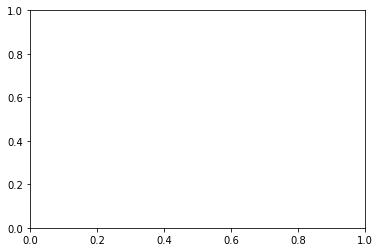

In [57]:
import matplotlib.pyplot as plt
boxplot = plt.figure()

axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([
    df_fine_dust[df_fine_dust['시도']=='강원'],['PM10']]
#     df_fine_dust[df_fine_dust['PM25']== 'PM25']['PM25']
    ,labels=['강원','PM10'])

axes1.set_xlabel('지역')
axes1.set_ylabe('미세먼지농도')
axes1.set_title('미세먼지 이상치 확인')


In [17]:
jjin_2016_1Q =df_2016_1Q[['측정일시','SO2','CO','O3','NO2','PM10','PM25']]
jjin_2016_2Q =df_2016_2Q[['측정일시',

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2016010101,0.004,0.6,0.023,0.015,47.0,38.0
1,2016010102,0.004,0.6,0.024,0.015,51.0,43.0
2,2016010103,0.004,0.6,0.024,0.014,52.0,44.0
3,2016010104,0.003,0.6,0.024,0.013,45.0,38.0
4,2016010105,0.004,0.6,0.025,0.013,43.0,37.0
...,...,...,...,...,...,...,...
698875,2016033120,0.004,1.0,0.009,0.086,91.0,25.0
698876,2016033121,0.004,0.8,0.009,0.068,123.0,35.0
698877,2016033122,0.004,0.8,0.009,0.062,133.0,46.0
698878,2016033123,0.004,0.8,0.008,0.057,137.0,52.0


In [22]:
split_col = df_2016_1Q['지역'].str.split(' ', expand=True)
split_col.columns = ['도','시']
print(split_col)

         도    시
0       강원  강릉시
1       강원  강릉시
2       강원  강릉시
3       강원  강릉시
4       강원  강릉시
...     ..  ...
698875  충북  충주시
698876  충북  충주시
698877  충북  충주시
698878  충북  충주시
698879  충북  충주시

[698880 rows x 2 columns]


In [14]:
province = split_col.str.get(0)
city = split_col.str.get(1)

province

0         강원
1         강원
2         강원
3         강원
4         강원
          ..
698875    충북
698876    충북
698877    충북
698878    충북
698879    충북
Name: 지역, Length: 698880, dtype: object